## Code Overview

##1 Upload training dataset
##2 Analysis of training dataset
* 2-1 Description of training dataset
* 2-2 Distributions of all variables

##3 Modeling
* 3-1 Data Splitting
* 3-2 Random Forest Model
* 3-3 XGBoost Model
* 3-4 Ensemble Model
* 3-5 Model Performance Comparison

##4 Internal validation
* 4-1 Internal dataset load
* 4-2 Predictions using trained models
* 4-3 Evaluation : Calculate accuracy based on the 20% threshold

##5 External validation
* 5-1 External dataset load
* 5-2 Predictions using trained models
* 5-3 Evaluation : Calculate accuracy based on the 20% threshold

##6 Model Performance Summary



##7 Feature importance analysis
* Random Forest
* XGBoost
* Ensemble Model


##8 supplementary materials
* 8-1 Distributions of internal training dataset
* 8-2 Distributions of external training dataset



# #1 Upload training dataset


In [1]:
# Uploading 'Training_dataset_205patients.xlsx'
from google.colab import files
uploaded = files.upload()

Saving Training_dataset_205patients.xlsx to Training_dataset_205patients (8).xlsx


In [2]:
import pandas as pd
df_training = pd.read_excel('Training_dataset_205patients.xlsx')

# #2 Analysis of training dataset

## #2-1 Description of training dataset


In [3]:
df_training.describe()

,Gender,Age,BW,Height,BMI,ICU,WBC,RBC,HCT,Hb,...,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Initial VCM_daily_dose
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.0,205.000000,205.000000,205.000000,205.0,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.565854,66.180488,61.351317,162.772195,23.072050,0.248780,11.238049,3.349220,30.600976,10.187805,...,0.0,0.170732,0.053659,0.053659,0.0,0.004878,0.214634,0.009756,0.102439,1845.097561
std,0.496858,15.760823,12.938187,9.196822,3.891011,0.433365,11.937349,0.755162,5.799197,2.038093,...,0.0,0.377195,0.225894,0.225894,0.0,0.069843,0.411573,0.098531,0.303967,535.065499
min,0.000000,21.000000,33.000000,135.000000,14.302382,0.000000,0.100000,1.890000,18.600000,6.100000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,500.000000
25%,0.000000,59.000000,52.000000,156.000000,20.532599,0.000000,6.600000,2.870000,26.100000,8.700000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1600.000000
50%,1.000000,70.000000,60.000000,163.000000,23.043983,0.000000,9.100000,3.280000,30.400000,10.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000.000000
75%,1.000000,79.000000,69.000000,170.000000,25.631167,0.000000,11.900000,3.760000,34.000000,11.500000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000.000000
max,1.000000,92.000000,113.300000,183.000000,35.759374,1.000000,116.300000,8.300000,46.400000,16.200000,...,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,5700.000000


In [4]:
# Group by 'Gender' and calculate mean values for each group
# In this dataset, 'Gender' is coded as 0 for female and 1 for male
grouped_summary = df_training.groupby('Gender').mean()
print(grouped_summary)

              Age         BW      Height        BMI       ICU        WBC  \
Gender                                                                     
0       66.797753  55.260000  155.810112  22.793850  0.325843  12.073034   
1       65.706897  66.024828  168.113793  23.285496  0.189655  10.597414   

             RBC        HCT         Hb         PLT  ...  ACEi  Fusosemide  \
Gender                                              ...                     
0       3.176966  29.403371   9.710112  278.101124  ...   0.0    0.168539   
1       3.481379  31.519828  10.554310  240.913793  ...   0.0    0.172414   

        Diuretics  Vasopressors  LAB        AG       TZP       FLC        FQ  \
Gender                                                                         
0        0.056180      0.067416  0.0  0.011236  0.168539  0.011236  0.089888   
1        0.051724      0.043103  0.0  0.000000  0.250000  0.008621  0.112069   

        Initial VCM_daily_dose  
Gender                          

## #2-2 Distributions of all variables

<ipython-input-5-2c8779447707>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-5-2c8779447707>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-5-2c8779447707>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-5-2c877944

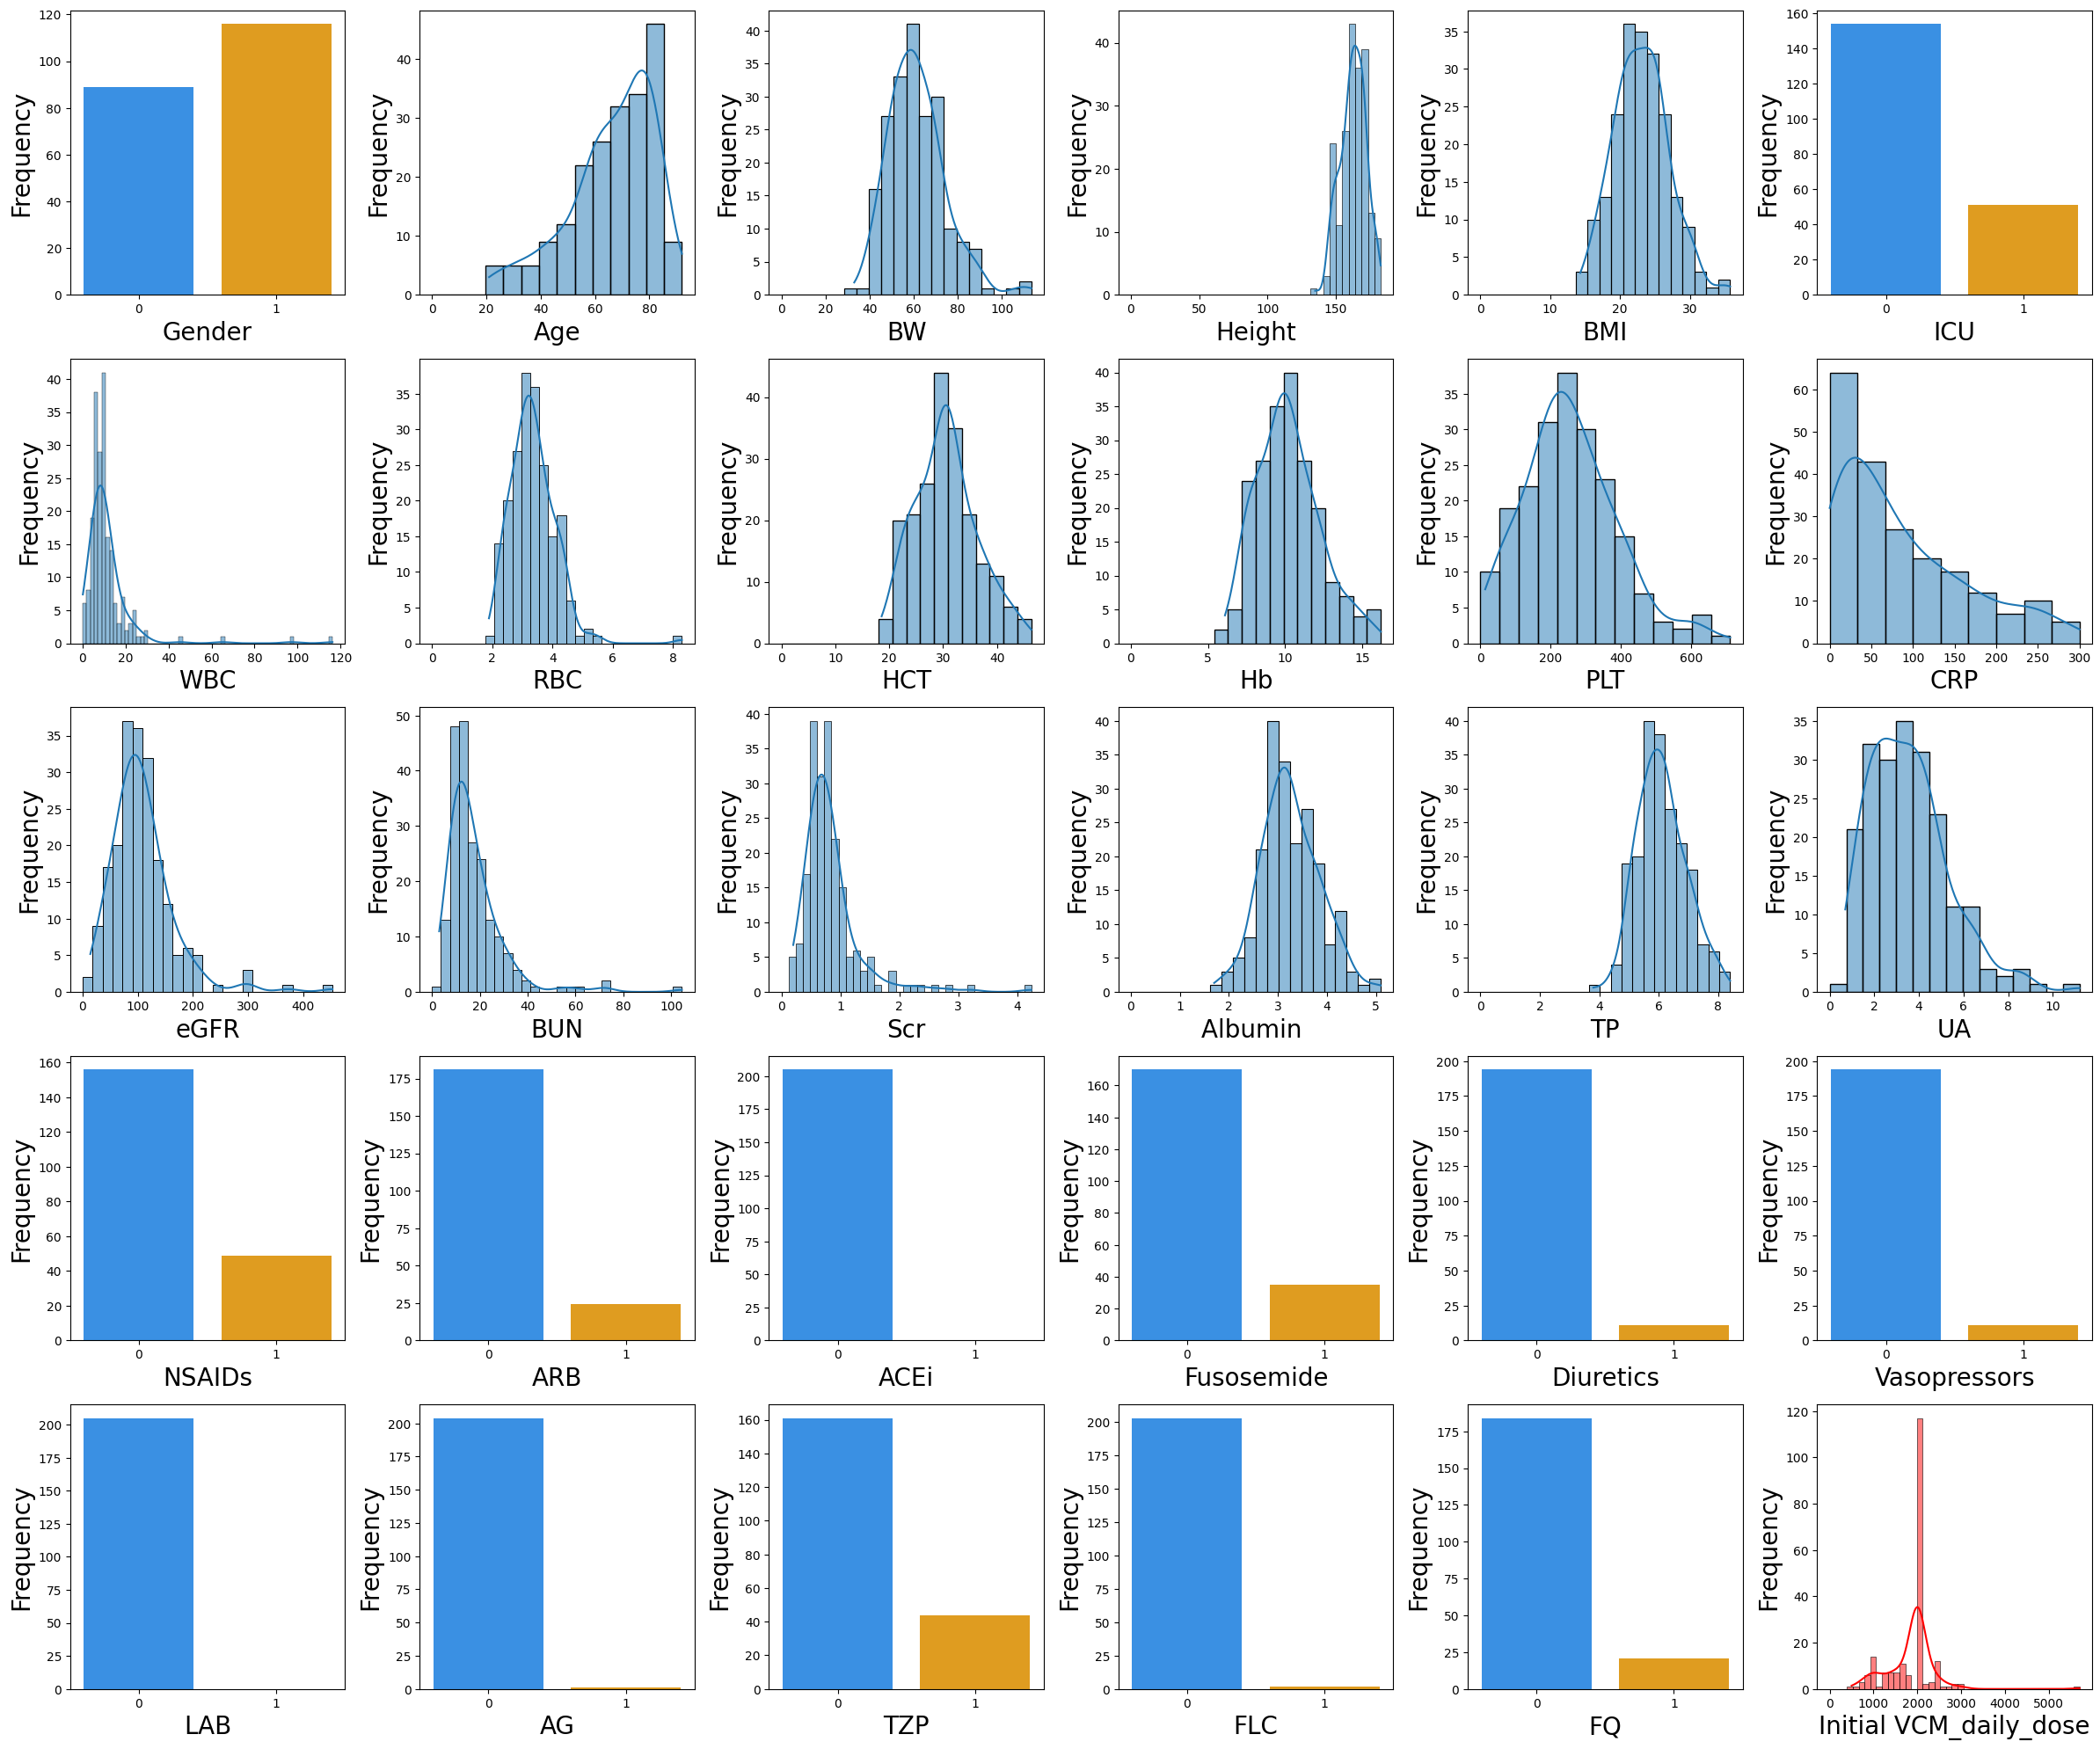

In [5]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

all_variables = df_training.columns
target_variable = 'Initial VCM_daily_dose'

# List of columns with binary values
binary_columns = ['Gender', 'ICU', 'NSAIDs', 'ARB', 'ACEi', 'Fusosemide', 'Diuretics', 'Vasopressors', 'LAB', 'AG', 'TZP', 'FLC', 'FQ']

# Setting up the figure size based on the number of variables
fig, axs = plt.subplots(5, 6, figsize=(24, 20))
sns.set_palette('colorblind')

for i, variable in enumerate(all_variables):
    row = i // 6
    col = i % 6
    if variable == target_variable:
        sns.histplot(df_training[variable], kde=True, color='red', ax=axs[row, col], binrange=(0, df_training[variable].max()))
    elif variable in binary_columns:
        sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
    else:
        sns.histplot(df_training[variable], kde=True, ax=axs[row, col], binrange=(0, df_training[variable].max()))
    axs[row, col].set_xlabel(variable, fontsize=20)
    axs[row, col].set_ylabel('Frequency', fontsize=20)

plt.tight_layout()

# Save the figure with Distributions of all variables (300 dpi)
plt.savefig('Distributions of all variables.png', dpi=300)

In [6]:
# Download the figure
files.download('Distributions of all variables.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# #3 Modeling

## #3-1 Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and the target variable
X = df_training.drop('Initial VCM_daily_dose', axis=1)
y = df_training['Initial VCM_daily_dose']

# Split the data into training and testing sets
# Here, 80% of the data is used for training and 20% for testing.
# random_state ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the dimensions of the train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (164, 29)
Test set shape: (41, 29)


In [8]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # Training the model

# Train an XGBoost model
xg_model = xgb.XGBRegressor(random_state=42)
xg_model.fit(X_train, y_train)  # Training the model

# Predict on the test set
rf_predictions = rf_model.predict(X_test)
xg_predictions = xg_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate the XGBoost model
xg_mse = mean_squared_error(y_test, xg_predictions)
xg_rmse = np.sqrt(xg_mse)
xg_r2 = r2_score(y_test, xg_predictions)

# Ensemble model using average of predictions from Random Forest and XGBoost
ensemble_predictions = (rf_predictions + xg_predictions) / 2

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Compile performance metrics into a DataFrame for better visualization
performance_data = {
    "Model": ["Random Forest", "XGBoost", "Ensemble"],
    "MSE": [rf_mse, xg_mse, ensemble_mse],
    "RMSE": [rf_rmse, xg_rmse, ensemble_rmse],
    "R^2 Score": [rf_r2, xg_r2, ensemble_r2]
}

performance_df = pd.DataFrame(performance_data)
performance_df

,Model,MSE,RMSE,R^2 Score
0,Random Forest,458320.821402,676.993960,0.210232
1,XGBoost,478707.271548,691.886748,0.175102
2,Ensemble,462991.837893,680.435036,0.202183


In [9]:
!pip install python-docx

In [10]:
from docx import Document
from docx.shared import Inches

# Create a new Word document
doc = Document()

# Add a title
doc.add_heading('Model Performance', level=1)

# Add the DataFrame to the Word document
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'

# Add the column names
for i, column_name in enumerate(performance_df.columns):
    table.cell(0, i).text = column_name

# Add the data from the DataFrame
for index, row in performance_df.iterrows():
    cells = table.add_row().cells
    for i, value in enumerate(row):
        cells[i].text = str(value)

# Save the Word document
doc.save('model_performance.docx')

# Download the docs
files.download('model_performance.docx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## #3-2 Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # Training the model

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model Performance:")
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R^2 Score:", rf_r2)

Random Forest Model Performance:
Mean Squared Error: 458320.821402439
Root Mean Squared Error: 676.9939596498915
R^2 Score: 0.21023153654244964


## #3-3 XGBoost Model

In [13]:
import xgboost as xgb

# Train an XGBoost model
xg_model = xgb.XGBRegressor(random_state=42)
xg_model.fit(X_train, y_train)  # Training the model

# Predict on the test set
xg_predictions = xg_model.predict(X_test)

# Evaluate the model
xg_mse = mean_squared_error(y_test, xg_predictions)
xg_rmse = np.sqrt(xg_mse)
xg_r2 = r2_score(y_test, xg_predictions)

print("XGBoost Model Performance:")
print("Mean Squared Error:", xg_mse)
print("Root Mean Squared Error:", xg_rmse)
print("R^2 Score:", xg_r2)

XGBoost Model Performance:
Mean Squared Error: 478707.2715480812
Root Mean Squared Error: 691.88674763149
R^2 Score: 0.17510204939060947


## #3-4 Ensemble Model

In [14]:
# Ensemble of Random Forest and XGBoost predictions
ensemble_predictions = (rf_predictions + xg_predictions) / 2

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("Ensemble Model Performance:")
print("Mean Squared Error:", ensemble_mse)
print("Root Mean Squared Error:", ensemble_rmse)
print("R^2 Score:", ensemble_r2)

Ensemble Model Performance:
Mean Squared Error: 462991.8378927666
Root Mean Squared Error: 680.4350357622442
R^2 Score: 0.2021825425974163


## #3-5 Model Performance Comparison

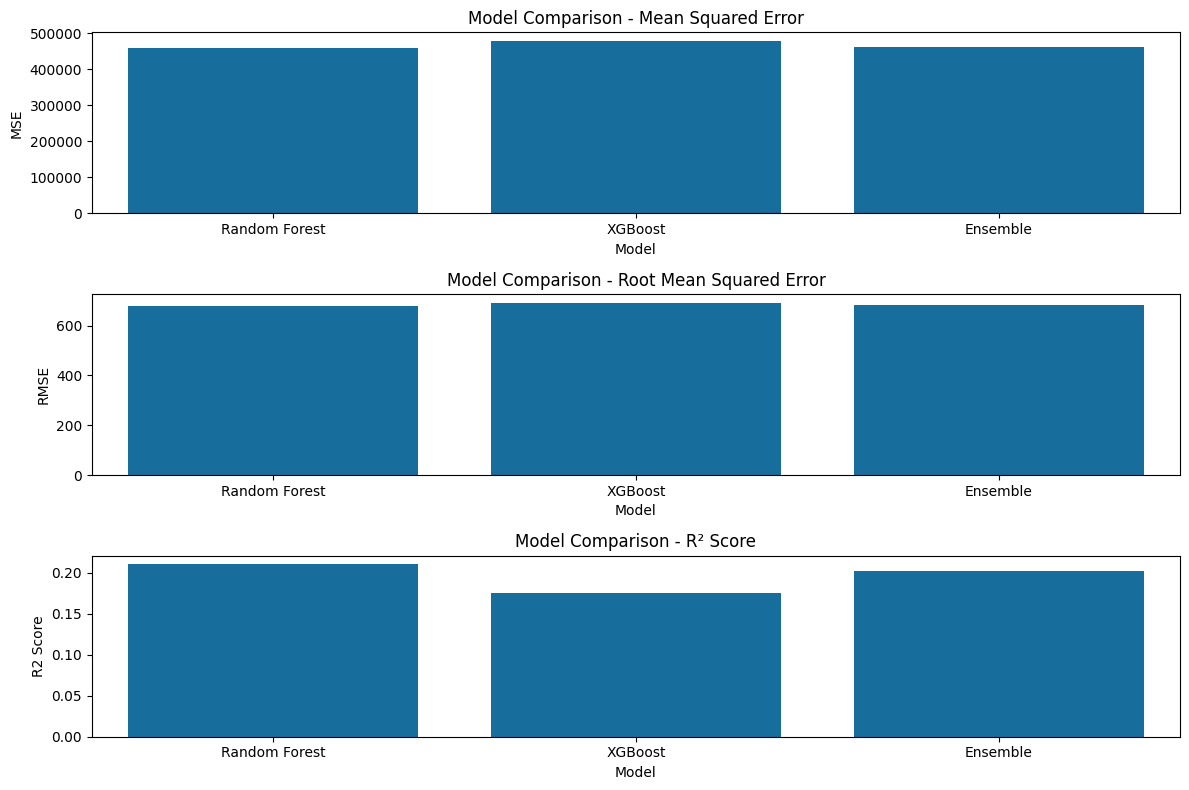

In [15]:
# Performance metrics of each model
metrics = {
    'Model': ['Random Forest', 'XGBoost', 'Ensemble'],
    'MSE': [rf_mse, xg_mse, ensemble_mse],
    'RMSE': [rf_rmse, xg_rmse, ensemble_rmse],
    'R2 Score': [rf_r2, xg_r2, ensemble_r2]
}

# Convert to DataFrame for easy visualization
performance_df = pd.DataFrame(metrics)

# Visualizing the performance metrics
plt.figure(figsize=(12, 8))

# Plotting MSE
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MSE', data=performance_df)
plt.title('Model Comparison - Mean Squared Error')

# Plotting RMSE
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE', data=performance_df)
plt.title('Model Comparison - Root Mean Squared Error')

# Plotting R2 Score
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R2 Score', data=performance_df)
plt.title('Model Comparison - R² Score')

plt.tight_layout()
plt.show()

In [16]:
# Finding the model with the highest R² Score
best_model_index = performance_df['R2 Score'].idxmax()
best_model_name = performance_df['Model'][best_model_index]

print("The best model is:", best_model_name)

The best model is: Random Forest


# #4 Internal Validation

## #4-1 Data load

In [17]:
# Uploading 'Internal_validation_dataset_44patients.xlsx'
uploaded = files.upload()

Saving Internal_validation_dataset_44patients.xlsx to Internal_validation_dataset_44patients (1).xlsx


In [18]:
df_internal = pd.read_excel('Internal_validation_dataset_44patients.xlsx')

In [19]:
df_internal.describe()

,Gender,Age,BW,Height,BMI,ICU,WBC,RBC,HCT,Hb,...,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Initial VCM_daily_dose
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.0,44.000000,44.0,44.000000,44.000000,44.0,44.000000,44.0,44.000000,44.000000
mean,0.522727,63.340909,66.490909,162.640909,24.997346,0.204545,9.225000,3.725455,33.313636,11.025000,...,0.0,0.113636,0.0,0.090909,0.022727,0.0,0.250000,0.0,0.068182,2104.545455
std,0.505258,17.234286,15.418953,9.144787,4.619760,0.408032,5.646449,0.826701,7.111360,2.448552,...,0.0,0.321038,0.0,0.290803,0.150756,0.0,0.438019,0.0,0.254972,881.186976
min,0.000000,18.000000,45.000000,144.000000,17.501600,0.000000,0.600000,1.970000,18.600000,5.900000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,750.000000
25%,0.000000,55.750000,55.900000,153.000000,22.273183,0.000000,4.900000,3.052500,28.250000,9.400000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1600.000000
50%,1.000000,65.000000,62.050000,163.400000,23.688076,0.000000,7.550000,3.735000,33.550000,10.850000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2000.000000
75%,1.000000,74.250000,70.725000,170.125000,27.548543,0.000000,12.475000,4.407500,38.350000,12.675000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.000000,2500.000000
max,1.000000,86.000000,104.000000,181.600000,39.260790,1.000000,23.400000,5.270000,45.900000,15.500000,...,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,6000.000000


In [20]:
X_internal = df_internal.drop('Initial VCM_daily_dose', axis=1)
y_internal = df_internal['Initial VCM_daily_dose']

## #4-2 Predictions using trained models

In [21]:
# Predictions using trained models
rf_predictions_internal = rf_model.predict(X_internal)
xg_predictions_internal = xg_model.predict(X_internal)

# Ensemble predictions
ensemble_predictions_internal = (rf_predictions_internal + xg_predictions_internal) / 2

## #4-3 Evaluation : Calculate accuracy based on the 20% threshold

In [22]:
# Function to calculate accuracy based on the 20% threshold
def calculate_accuracy(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) <= 0.2 * y_true)

In [23]:
# Calculate and print accuracies for each model
rf_accuracy_internal = calculate_accuracy(y_internal, rf_predictions_internal)
xg_accuracy_internal = calculate_accuracy(y_internal, xg_predictions_internal)
ensemble_accuracy_internal = calculate_accuracy(y_internal, ensemble_predictions_internal)

In [24]:
print("Random Forest - Internal Validation Accuracy:", rf_accuracy_internal)
print("XGBoost - Internal Validation Accuracy:", xg_accuracy_internal)
print("Ensemble - Internal Validation Accuracy:", ensemble_accuracy_internal)

Random Forest - Internal Validation Accuracy: 0.5681818181818182
XGBoost - Internal Validation Accuracy: 0.5454545454545454
Ensemble - Internal Validation Accuracy: 0.5909090909090909


# #5 External validation

## #5-1 Dataset load

In [25]:
# Uploading 'External_validation_dataset_35patients.xlsx'
uploaded = files.upload()

Saving External_validation_dataset_35patients.xlsx to External_validation_dataset_35patients (1).xlsx


In [27]:
df_external = pd.read_excel('External_validation_dataset_35patients.xlsx')

In [28]:
df_external.describe()

,Gender,Age,BW,Height,BMI,ICU,WBC,RBC,HCT,Hb,...,ACEi,Fusosemide,Diuretics,Vasopressors,LAB,AG,TZP,FLC,FQ,Initial VCM_daily_dose
count,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.0,35.000000,35.0,35.000000,35.0,35.0,35.00000,35.0,35.000000,35.000000
mean,0.80000,68.771429,63.471429,165.411429,22.900652,0.628571,12.494286,3.270857,29.582857,10.102857,...,0.0,0.114286,0.0,0.285714,0.0,0.0,0.20000,0.0,0.085714,1882.857143
std,0.40584,18.594885,18.215630,9.689587,4.556124,0.490241,8.897582,0.632750,5.234135,1.761264,...,0.0,0.322803,0.0,0.458349,0.0,0.0,0.40584,0.0,0.284029,698.100665
min,0.00000,16.000000,40.000000,145.000000,15.241579,0.000000,0.280000,2.210000,21.300000,7.400000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,600.000000
25%,1.00000,64.500000,50.000000,160.000000,18.638126,0.000000,7.935000,2.830000,25.950000,8.850000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,1875.000000
50%,1.00000,74.000000,58.200000,166.000000,22.857143,1.000000,9.430000,3.160000,28.600000,9.700000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,2000.000000
75%,1.00000,80.000000,70.500000,171.000000,25.399980,1.000000,15.250000,3.840000,34.750000,11.750000,...,0.0,0.000000,0.0,1.000000,0.0,0.0,0.00000,0.0,0.000000,2000.000000
max,1.00000,92.000000,120.000000,185.000000,35.062089,1.000000,50.430000,4.570000,39.500000,13.500000,...,0.0,1.000000,0.0,1.000000,0.0,0.0,1.00000,0.0,1.000000,4800.000000


In [29]:
X_external = df_external.drop('Initial VCM_daily_dose', axis=1)
y_external = df_external['Initial VCM_daily_dose']

## #5-2 Predictions using trained models

In [30]:
# Predictions using trained models on the external dataset
rf_predictions_external = rf_model.predict(X_external)
xg_predictions_external = xg_model.predict(X_external)

# Ensemble predictions for the external dataset
ensemble_predictions_external = (rf_predictions_external + xg_predictions_external) / 2

## #5-3 Evaluation : Calculate accuracy based on the 20% threshold

In [31]:
# Calculate accuracies for each model on the external dataset
rf_accuracy_external = calculate_accuracy(y_external, rf_predictions_external)
xg_accuracy_external = calculate_accuracy(y_external, xg_predictions_external)
ensemble_accuracy_external = calculate_accuracy(y_external, ensemble_predictions_external)

# Print accuracy results for each model on the external dataset
print("Random Forest - External Validation Accuracy:", rf_accuracy_external)
print("XGBoost - External Validation Accuracy:", xg_accuracy_external)
print("Ensemble - External Validation Accuracy:", ensemble_accuracy_external)

Random Forest - External Validation Accuracy: 0.7142857142857143
XGBoost - External Validation Accuracy: 0.6285714285714286
Ensemble - External Validation Accuracy: 0.6571428571428571


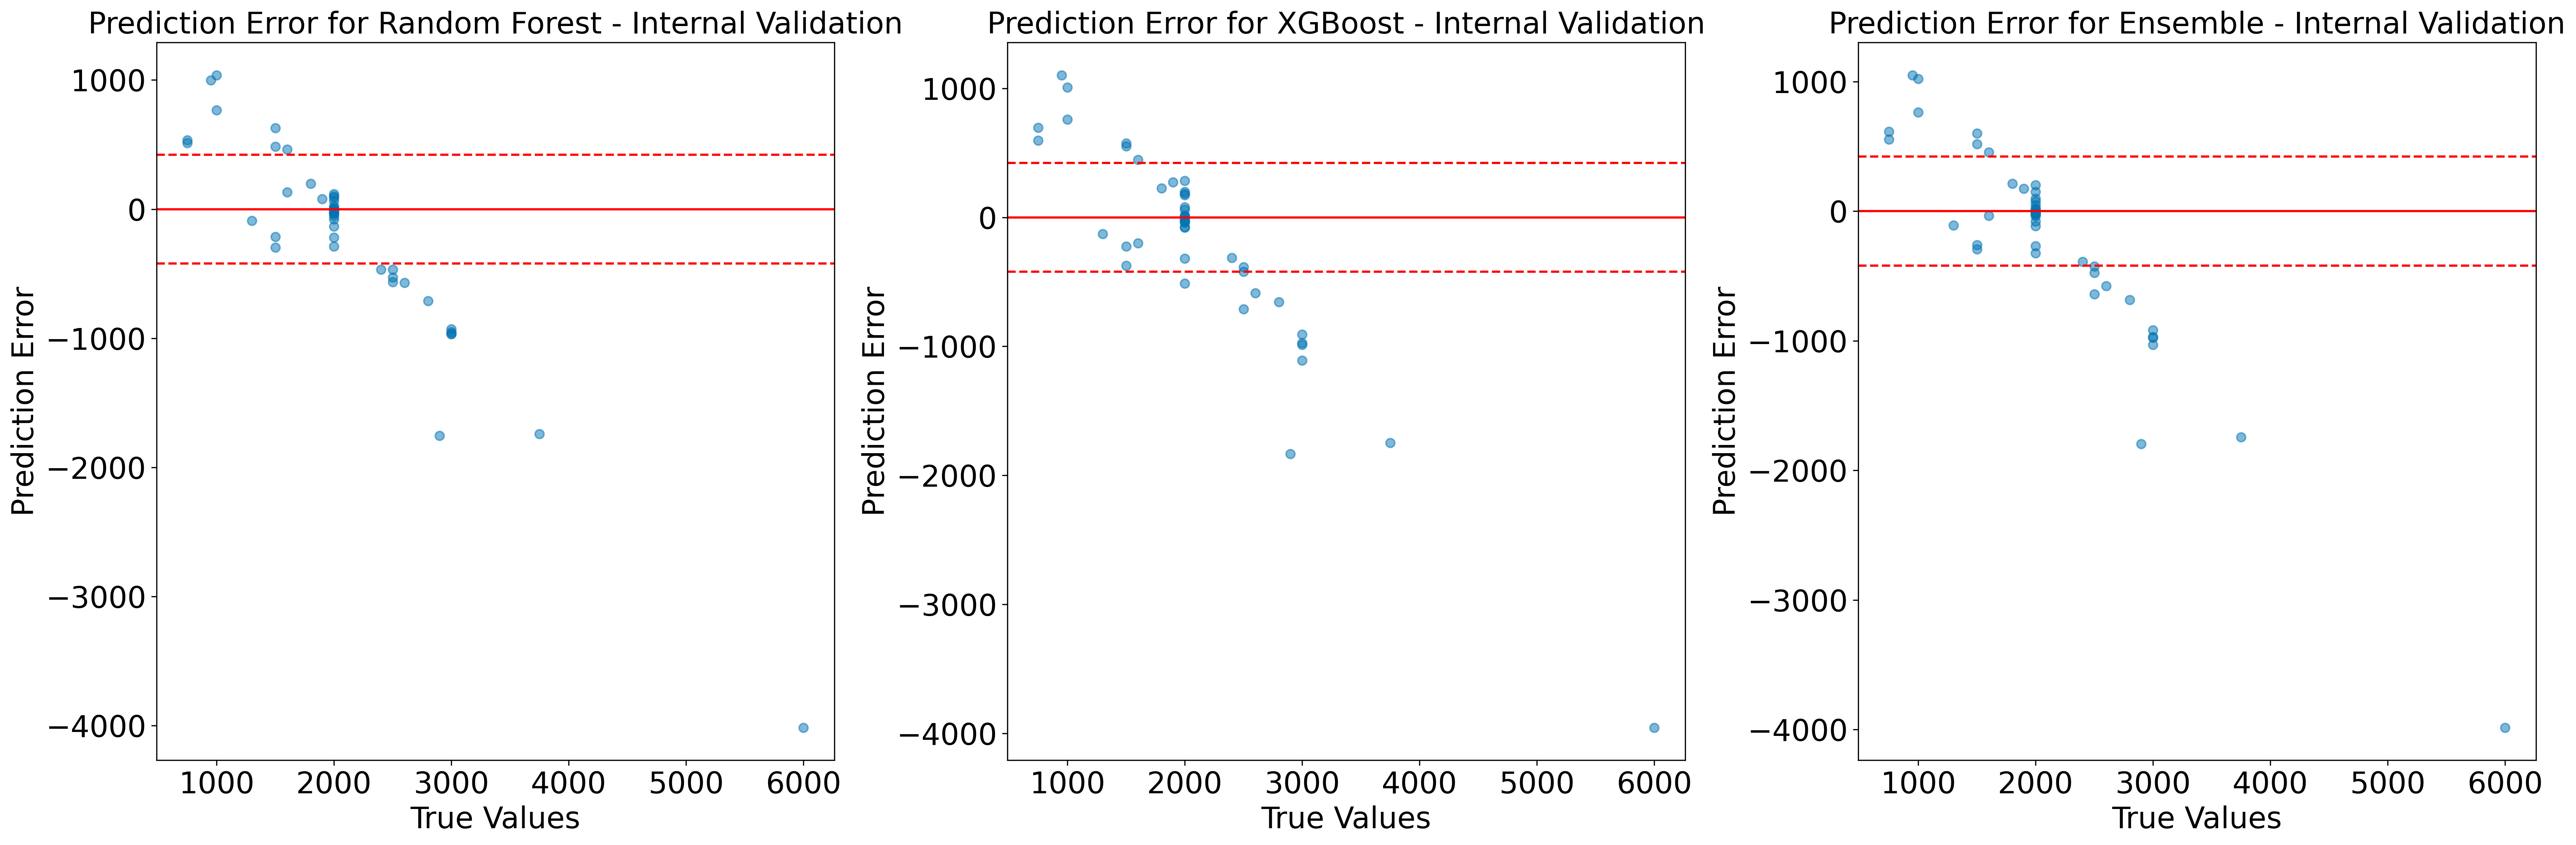

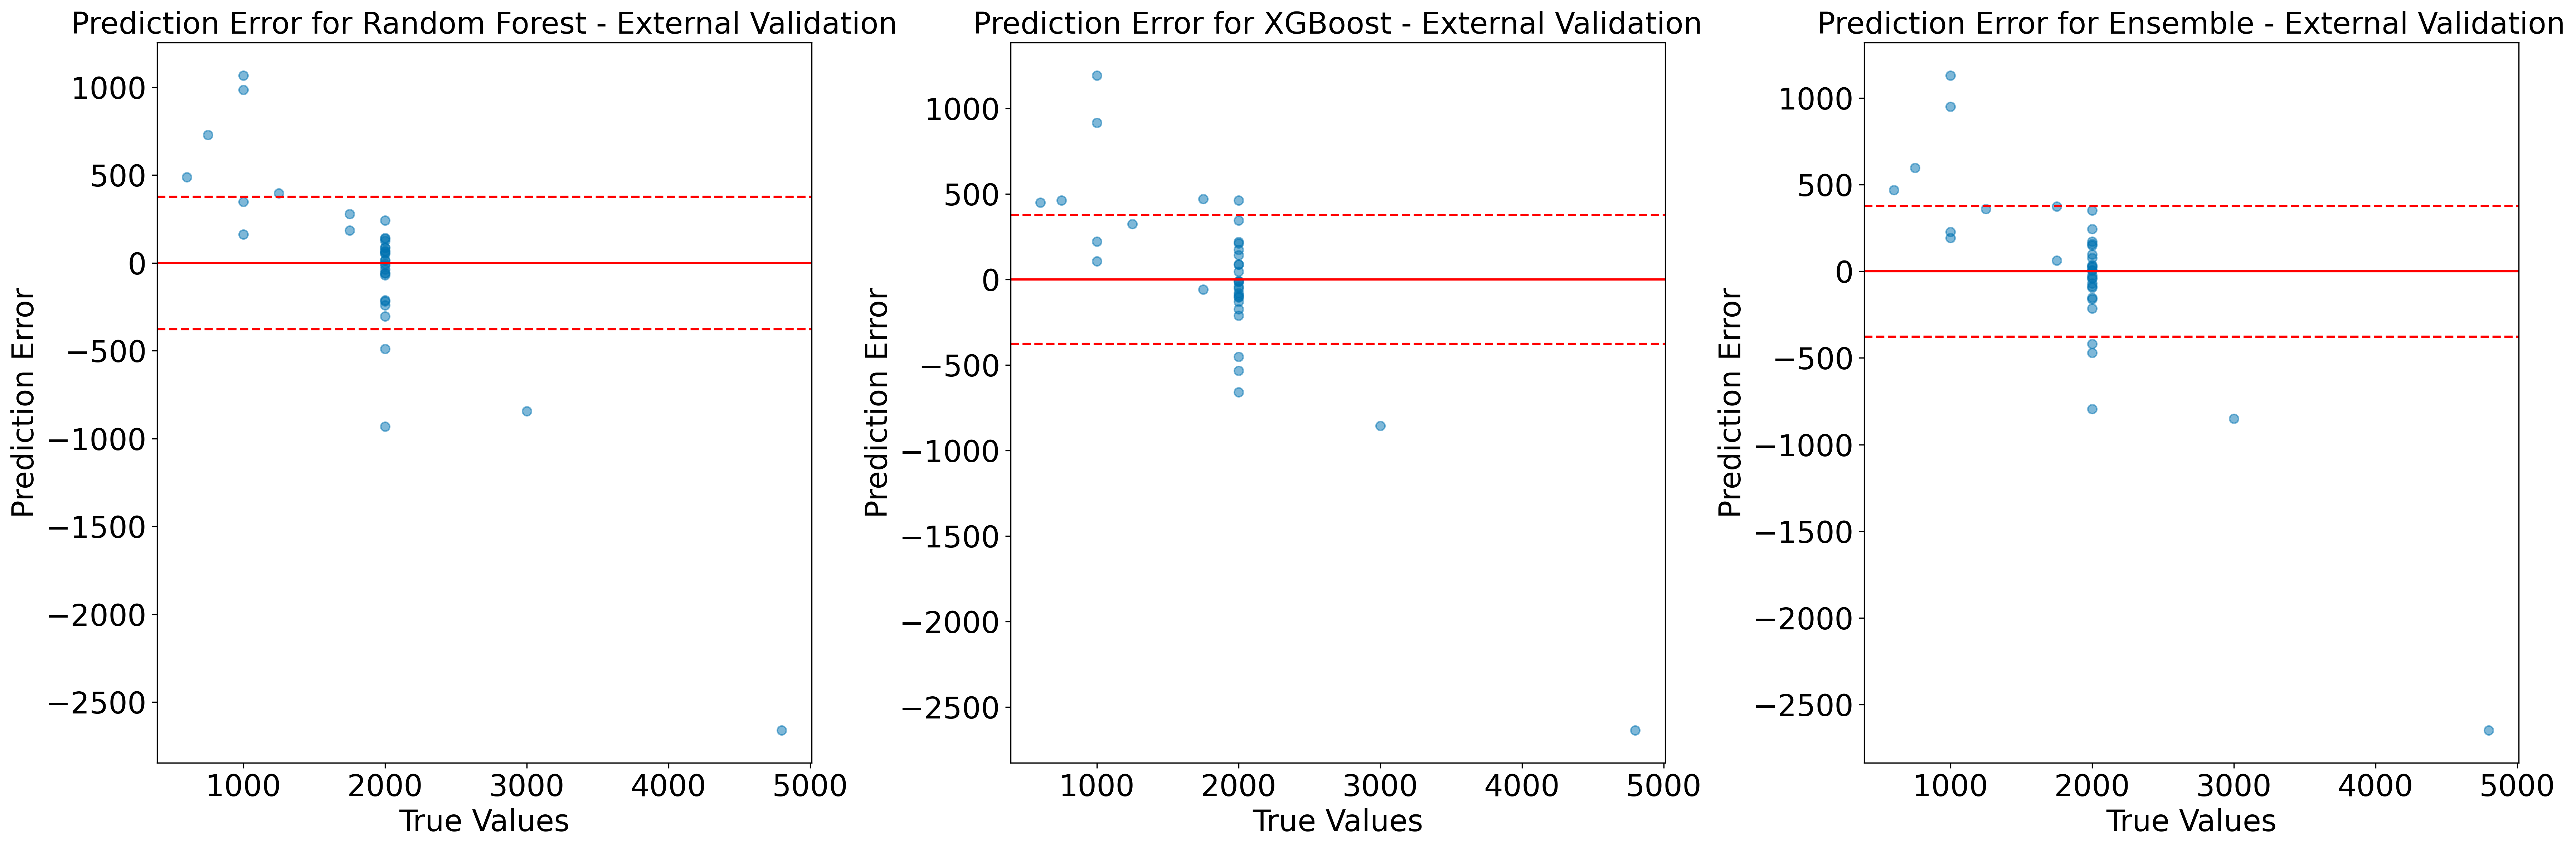

In [32]:
import matplotlib.pyplot as plt

def plot_prediction_error_with_threshold(y_true, y_pred, model_name, ax):
    ax.scatter(y_true, y_pred - y_true, alpha=0.5)
    ax.set_title(f'Prediction Error for {model_name}', fontsize=20)
    ax.set_xlabel('True Values', fontsize=20)
    ax.set_ylabel('Prediction Error', fontsize=20)
    ax.axhline(y=0, color='r', linestyle='-')  # Zero error line
    # Adding 20% error threshold lines
    ax.axhline(y=0.2 * np.mean(y_true), color='r', linestyle='--')
    ax.axhline(y=-0.2 * np.mean(y_true), color='r', linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=20)

# For internal validation
fig, axs = plt.subplots(1, 3, figsize=(24, 8), dpi=300)

plot_prediction_error_with_threshold(y_internal, rf_predictions_internal, "Random Forest - Internal Validation", axs[0])
plot_prediction_error_with_threshold(y_internal, xg_predictions_internal, "XGBoost - Internal Validation", axs[1])
plot_prediction_error_with_threshold(y_internal, ensemble_predictions_internal, "Ensemble - Internal Validation", axs[2])

plt.tight_layout()
plt.savefig("internal_validation_plots.png")

# For external validation
fig, axs = plt.subplots(1, 3, figsize=(24, 8), dpi=300)

plot_prediction_error_with_threshold(y_external, rf_predictions_external, "Random Forest - External Validation", axs[0])
plot_prediction_error_with_threshold(y_external, xg_predictions_external, "XGBoost - External Validation", axs[1])
plot_prediction_error_with_threshold(y_external, ensemble_predictions_external, "Ensemble - External Validation", axs[2])

plt.tight_layout()
plt.savefig("external_validation_plots.png")

In [33]:
# Download the figure
files.download('internal_validation_plots.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# Download the figure
files.download('external_validation_plots.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# #6 Model Performance Summary

##Internal Validation Results:
* Dataset Size: 44 patients
* Model Accuracy:
 * Random Forest : 56.8%
   * 25 out of 44 (Number of Correct Predictions)
 * XGBoost : 54.5%  
   * 24 out of 44 (Number of Correct Predictions)
 * Ensemble : 59.0%
   * 26 out of 44 (Number of Correct Predictions)

##External Validation Results:
* Dataset Size: 35 patients
* Model Accuracy:
 * Random Forest : 71.4%
   * 25 out of 35 (Number of Correct Predictions)
 * XGBoost : 62.8%
   * 22 out of 35 (Number of Correct Predictions)
 * Ensemble : 65.7%
   * 23 out of 35 (Number of Correct Predictions)

## #7 Feature importance analysis - Random Forest, XGBoost, Ensemble Model

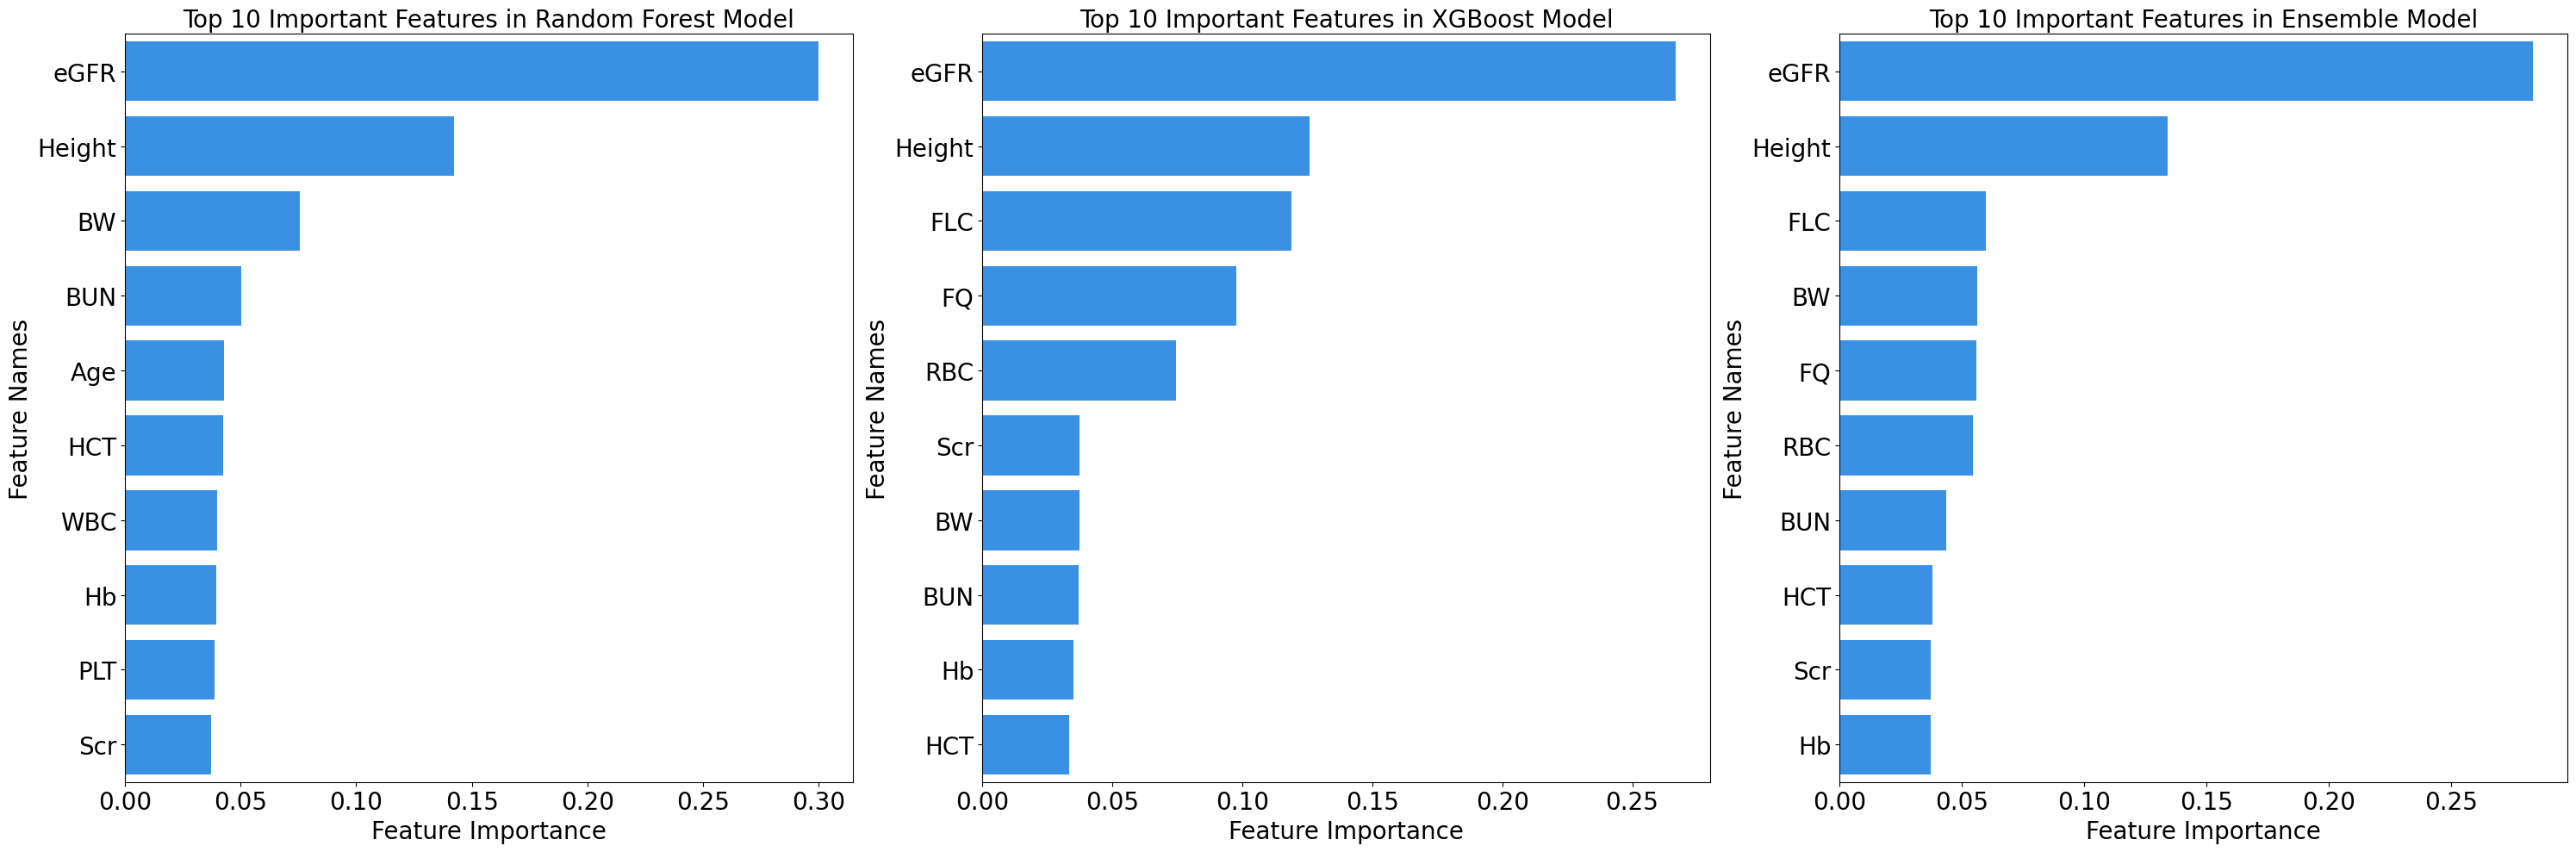

In [35]:
# Prepare the data: Separate features and the target variable
X = df_training.drop('Initial VCM_daily_dose', axis=1)  # All columns except the target
y = df_training['Initial VCM_daily_dose']               # Target variable

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)  # Training the model on the data

# Train an XGBoost model
xg_model = xgb.XGBRegressor()
xg_model.fit(X, y)  # Training the model on the data

# Train an Ensemble model (Random Forest and XGBoost)
ensemble_model = VotingRegressor([('rf', rf_model), ('xg', xg_model)])
ensemble_model.fit(X, y)  # Training the model on the data

# Calculate feature importances
rf_feature_importances = rf_model.feature_importances_
xg_feature_importances = xg_model.feature_importances_
ensemble_feature_importances = (rf_model.feature_importances_ + xg_model.feature_importances_) / 2

# Sorting the feature importances in descending order
rf_sorted_indices = np.argsort(rf_feature_importances)[::-1]  # Indices of features sorted by importance
xg_sorted_indices = np.argsort(xg_feature_importances)[::-1]  # Indices of features sorted by importance
ensemble_sorted_indices = np.argsort(ensemble_feature_importances)[::-1]  # Indices of features sorted by importance

# Top 10 feature names sorted by importance
rf_sorted_top_features = X.columns[rf_sorted_indices][:10]
xg_sorted_top_features = X.columns[xg_sorted_indices][:10]
ensemble_sorted_top_features = X.columns[ensemble_sorted_indices][:10]

# Top 10 feature importances
rf_sorted_top_importances = rf_feature_importances[rf_sorted_indices][:10]
xg_sorted_top_importances = xg_feature_importances[xg_sorted_indices][:10]
ensemble_sorted_top_importances = ensemble_feature_importances[ensemble_sorted_indices][:10]

# Visualize the top 10 important features
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

sns.barplot(y=rf_sorted_top_features, x=rf_sorted_top_importances, color='dodgerblue', ax=axs[0])
axs[0].set_title('Top 10 Important Features in Random Forest Model', fontsize=20)
axs[0].set_xlabel('Feature Importance', fontsize=20)
axs[0].set_ylabel('Feature Names', fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)

sns.barplot(y=xg_sorted_top_features, x=xg_sorted_top_importances, color='dodgerblue', ax=axs[1])
axs[1].set_title('Top 10 Important Features in XGBoost Model', fontsize=20)
axs[1].set_xlabel('Feature Importance', fontsize=20)
axs[1].set_ylabel('Feature Names', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)

sns.barplot(y=ensemble_sorted_top_features, x=ensemble_sorted_top_importances, color='dodgerblue', ax=axs[2])
axs[2].set_title('Top 10 Important Features in Ensemble Model', fontsize=20)
axs[2].set_xlabel('Feature Importance', fontsize=20)
axs[2].set_ylabel('Feature Names', fontsize=20)
axs[2].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()

# Save the figure with Feature importance analysis (300 dpi)
plt.savefig('Feature importance analysis.png', dpi=300)

In [36]:
# Download the figure
files.download('Feature importance analysis.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# #8 Supplemental Material - Distribution of Internal, external dataset

<ipython-input-37-a3468bcbbcce>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-37-a3468bcbbcce>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-37-a3468bcbbcce>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-37-a346

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

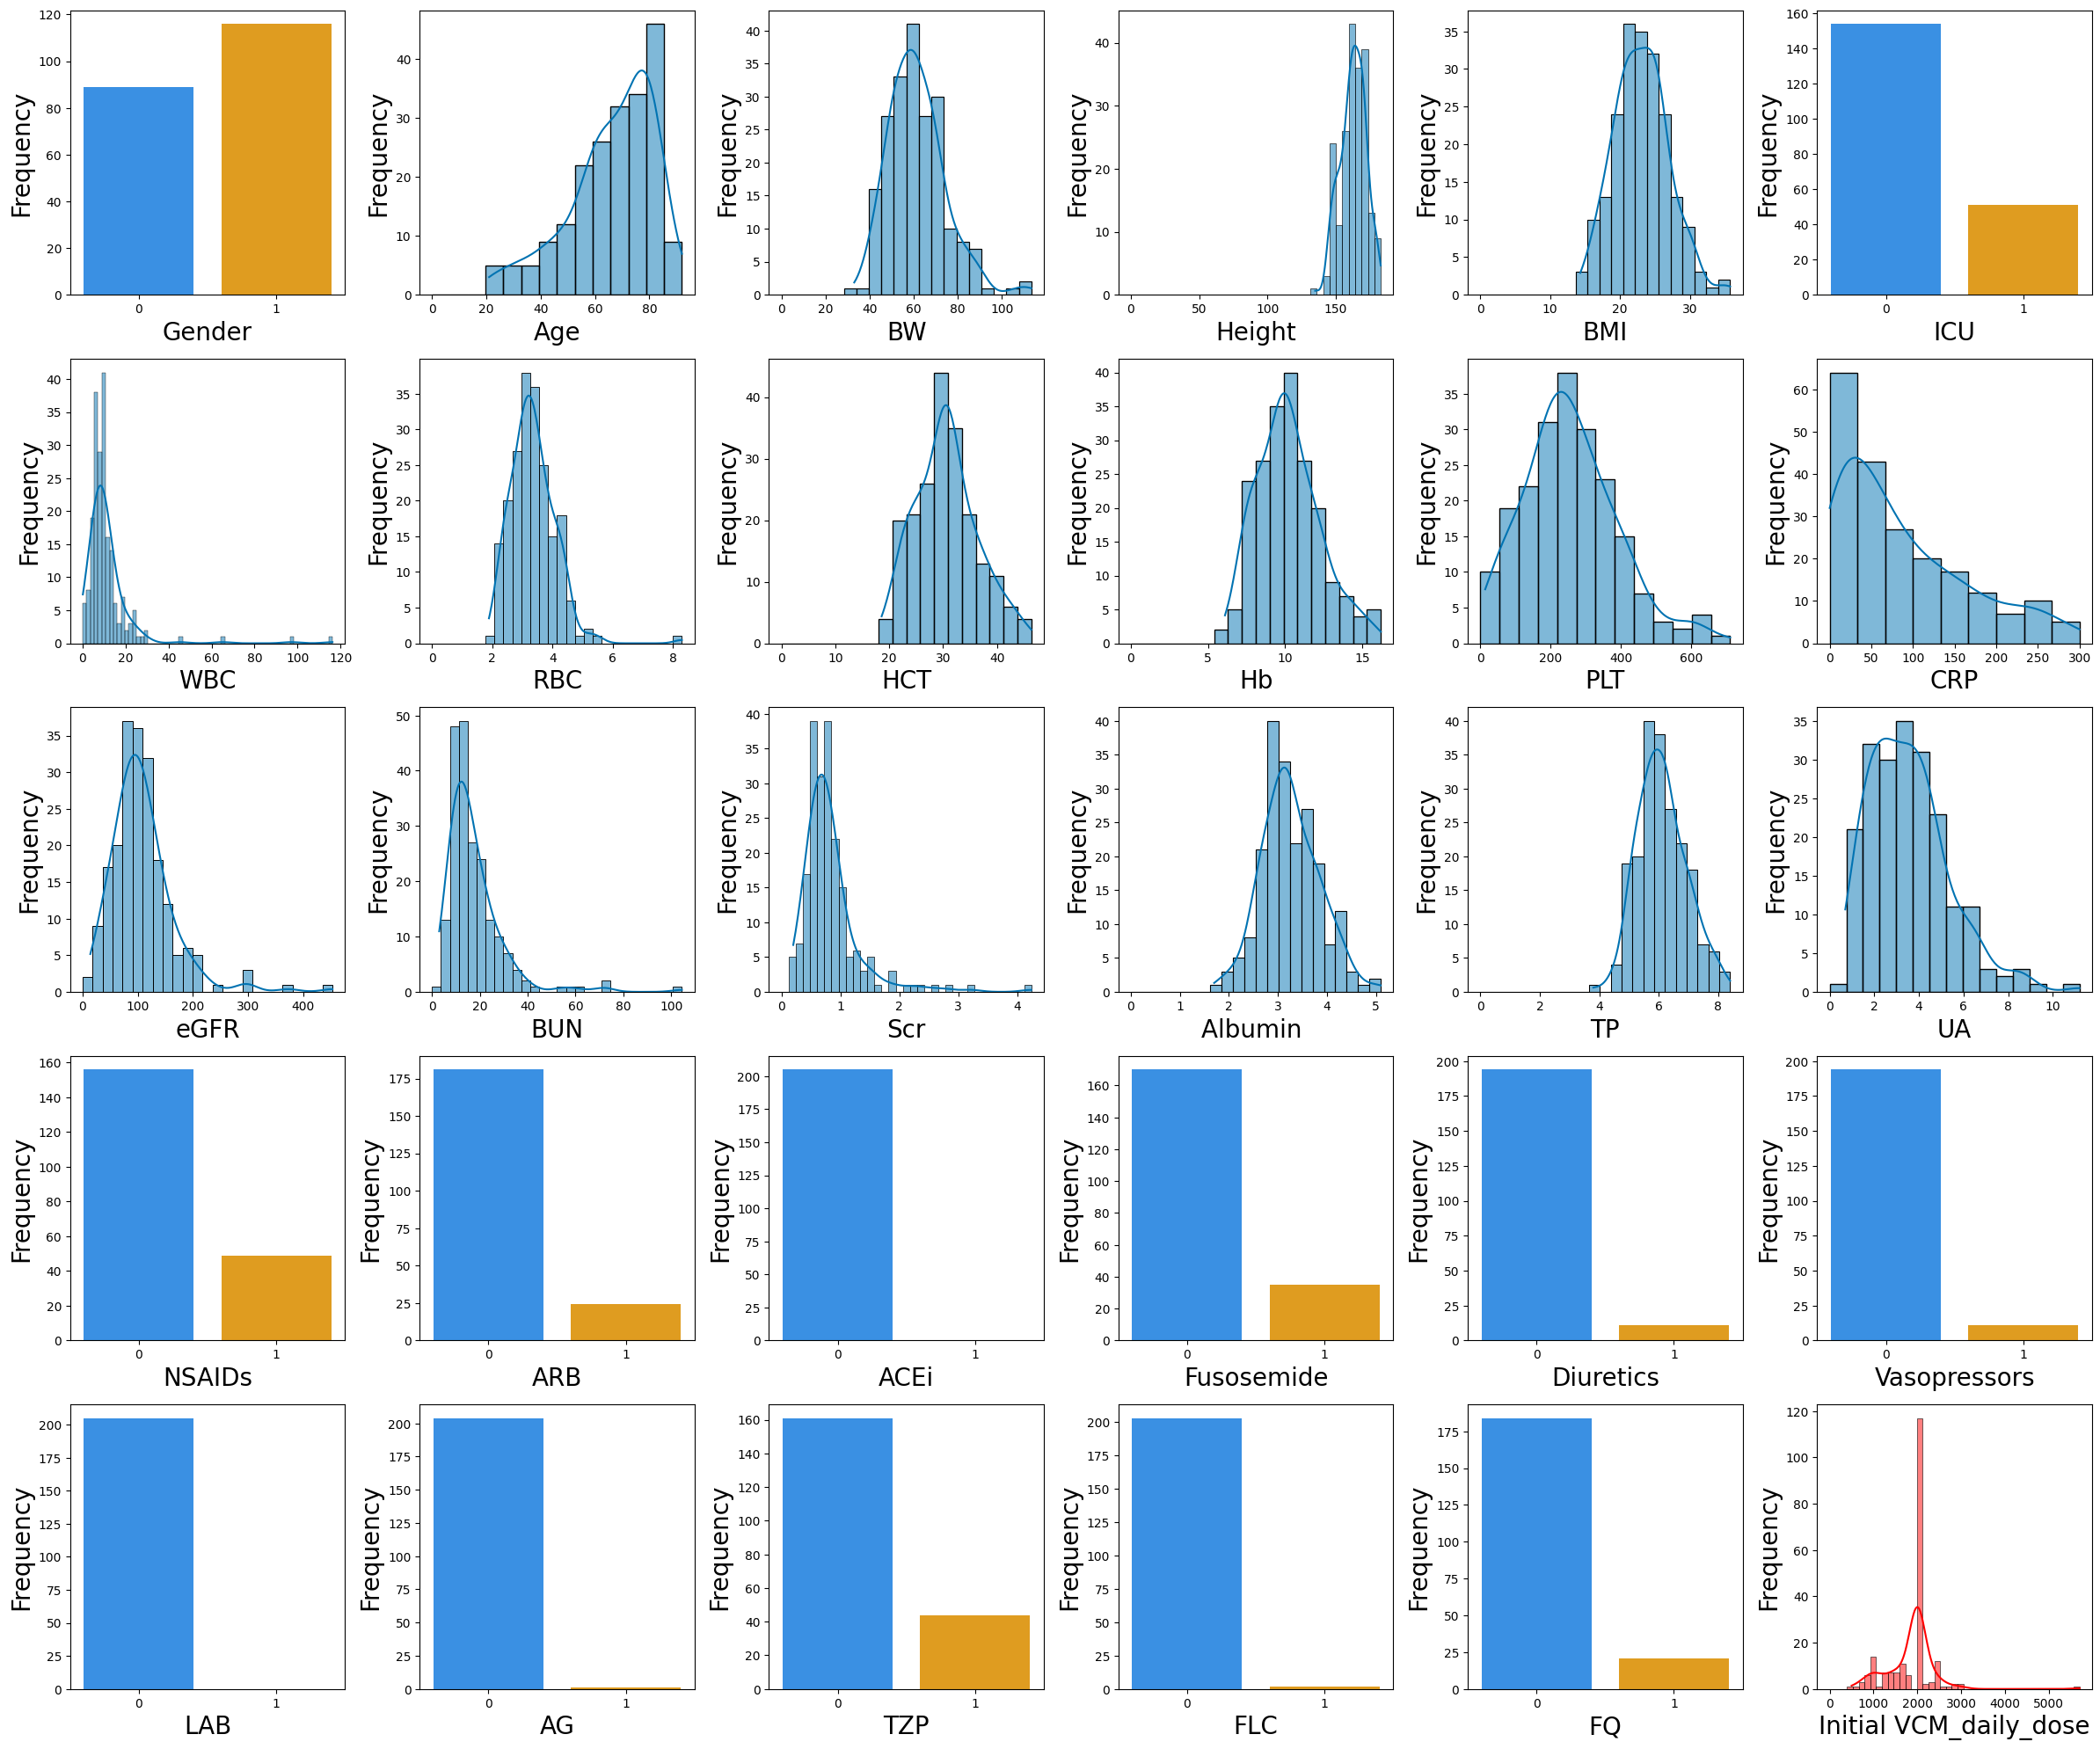

In [37]:
all_variables = df_internal.columns
target_variable = 'Initial VCM_daily_dose'

# List of columns with binary values
binary_columns = ['Gender', 'ICU', 'NSAIDs', 'ARB', 'ACEi', 'Fusosemide', 'Diuretics', 'Vasopressors', 'LAB', 'AG', 'TZP', 'FLC', 'FQ']

# Setting up the figure size based on the number of variables
fig, axs = plt.subplots(5, 6, figsize=(24, 20))

for i, variable in enumerate(all_variables):
    row = i // 6
    col = i % 6
    if variable == target_variable:
        sns.histplot(df_training[variable], kde=True, color='red', ax=axs[row, col], binrange=(0, df_training[variable].max()))
    elif variable in binary_columns:
        sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
    else:
        sns.histplot(df_training[variable], kde=True, ax=axs[row, col], binrange=(0, df_training[variable].max()))
    axs[row, col].set_xlabel(variable, fontsize=20)
    axs[row, col].set_ylabel('Frequency', fontsize=20)

plt.tight_layout()

# Save the figure with Distributions of all variables (300 dpi)
plt.savefig('Distributions of internal variables.png', dpi=300)

# Download the figure
files.download('Distributions of internal variables.png')

<ipython-input-38-cc11ba05981b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-38-cc11ba05981b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-38-cc11ba05981b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
<ipython-input-38-cc11

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

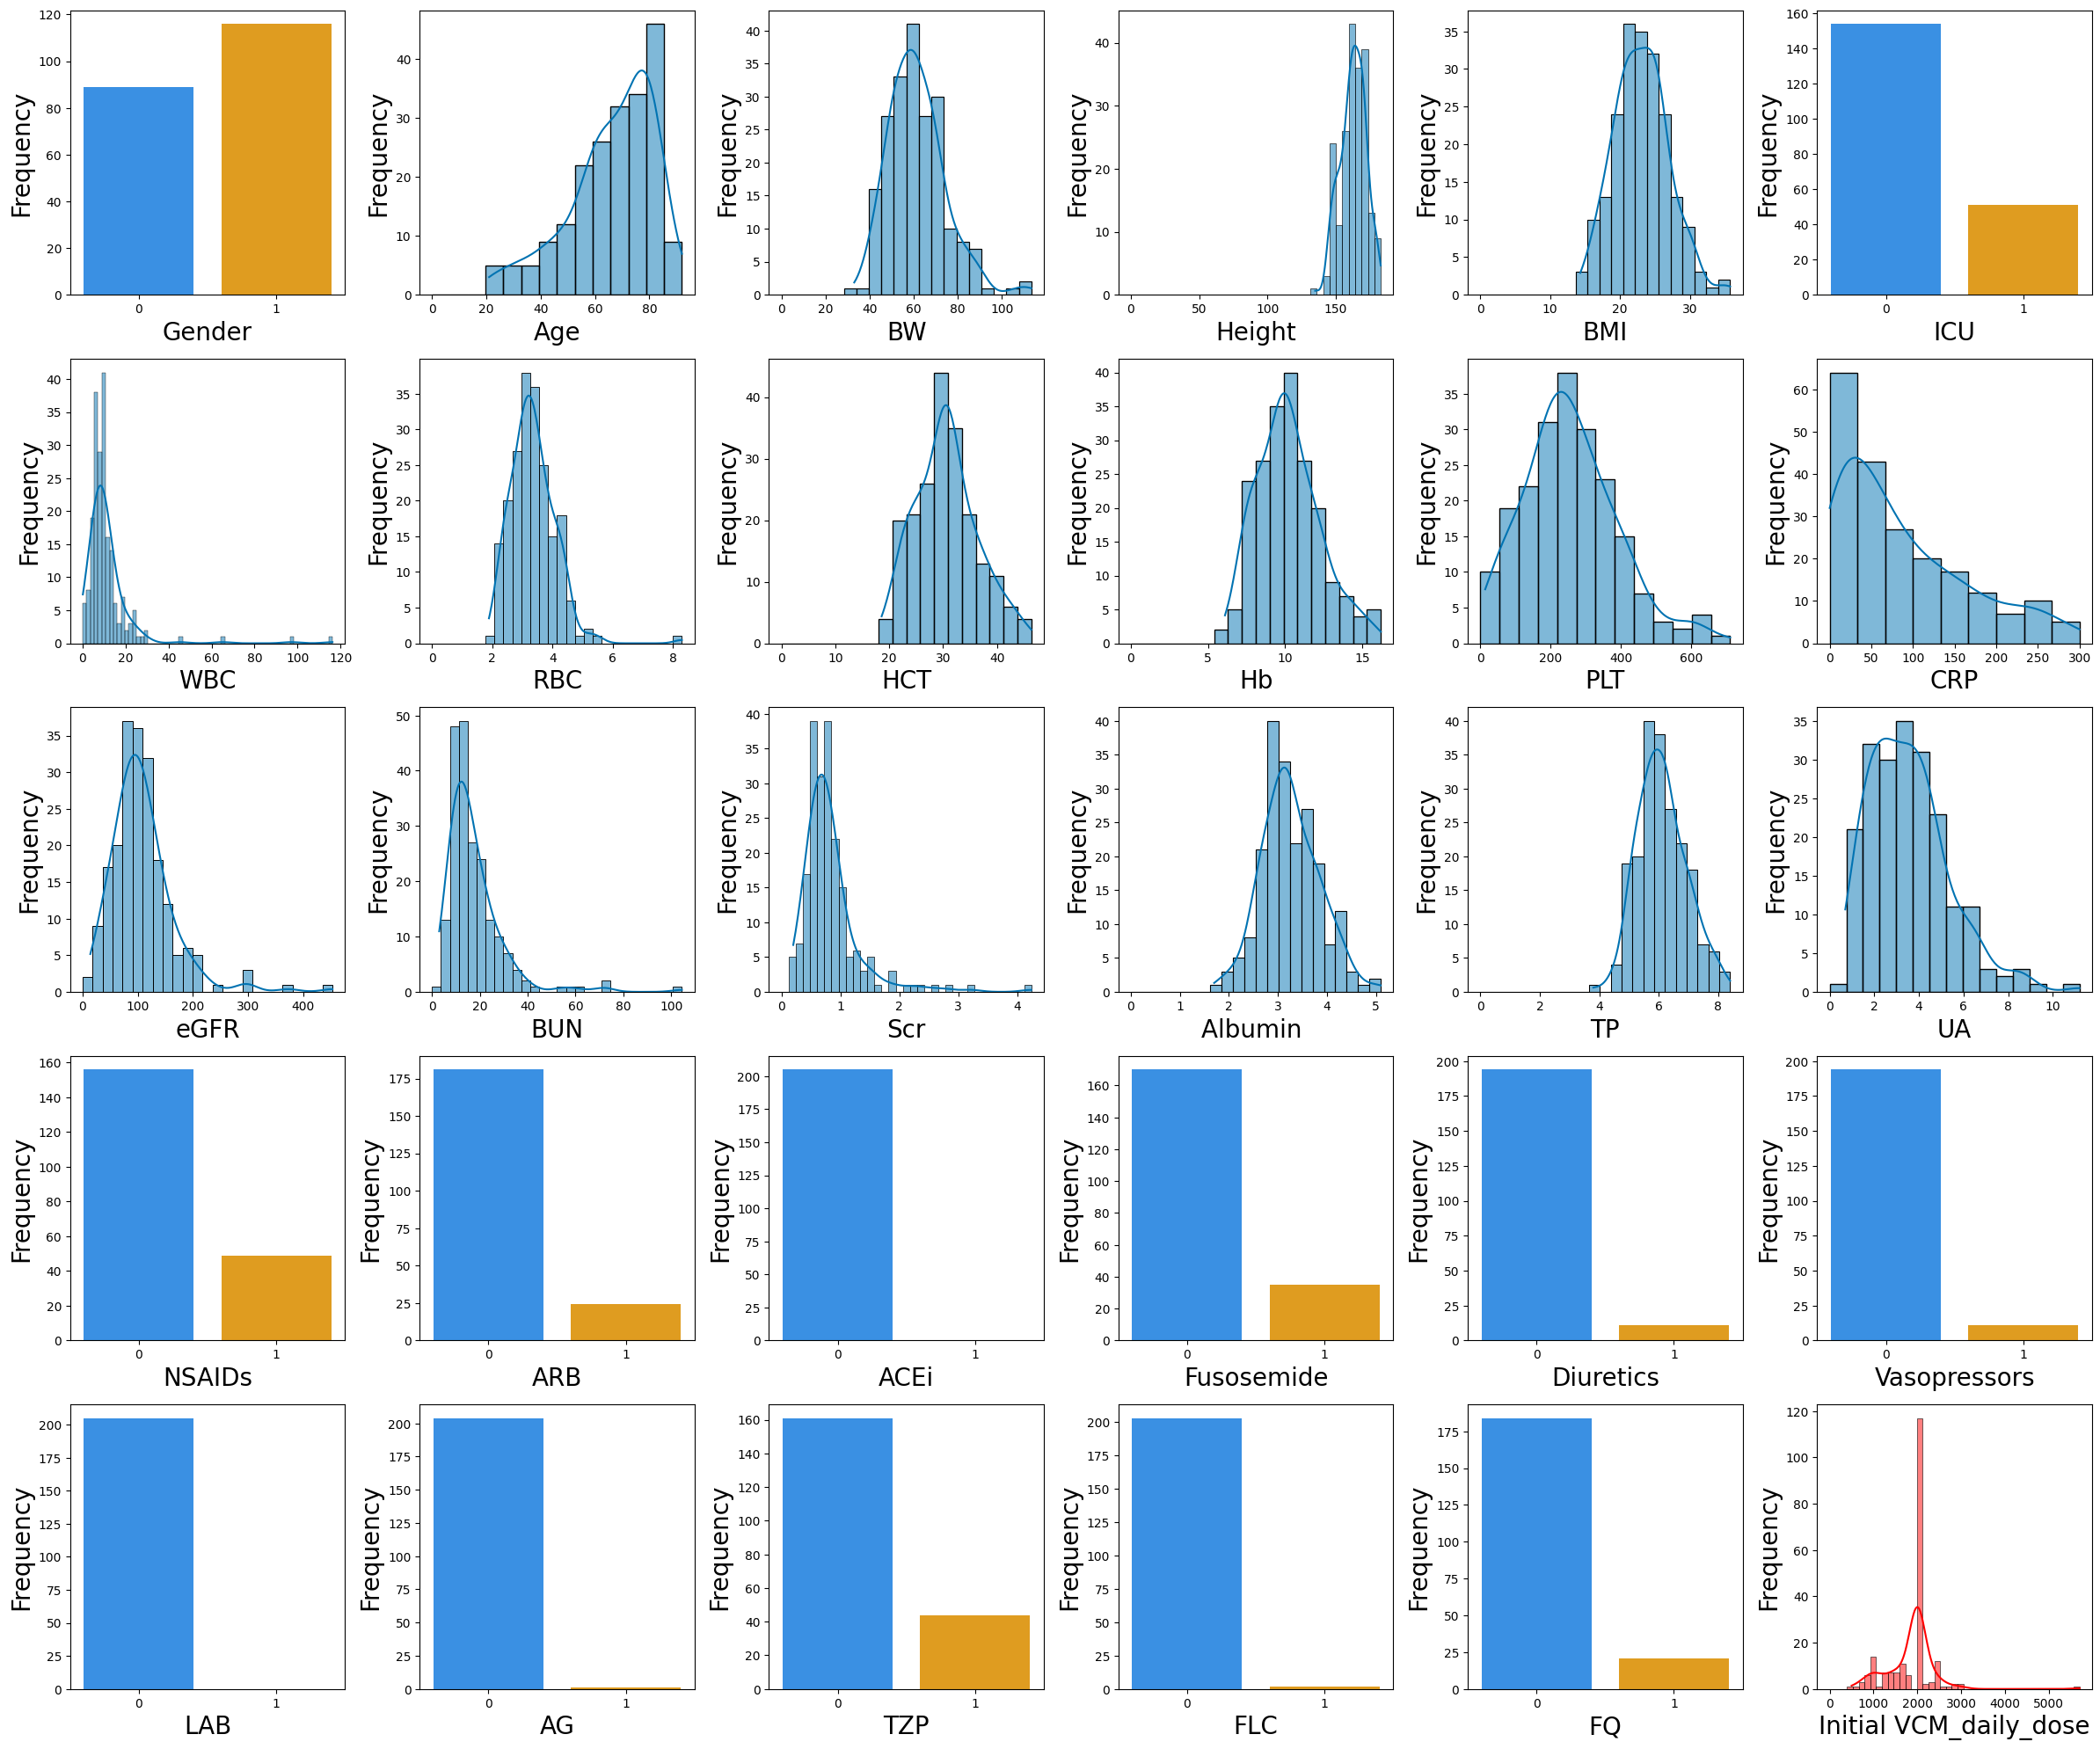

In [38]:
all_variables = df_external.columns
target_variable = 'Initial VCM_daily_dose'

# List of columns with binary values
binary_columns = ['Gender', 'ICU', 'NSAIDs', 'ARB', 'ACEi', 'Fusosemide', 'Diuretics', 'Vasopressors', 'LAB', 'AG', 'TZP', 'FLC', 'FQ']

# Setting up the figure size based on the number of variables
fig, axs = plt.subplots(5, 6, figsize=(24, 20))

for i, variable in enumerate(all_variables):
    row = i // 6
    col = i % 6
    if variable == target_variable:
        sns.histplot(df_training[variable], kde=True, color='red', ax=axs[row, col], binrange=(0, df_training[variable].max()))
    elif variable in binary_columns:
        sns.countplot(x=df_training[variable], ax=axs[row, col], order=[0, 1], palette=['dodgerblue', 'orange'])
    else:
        sns.histplot(df_training[variable], kde=True, ax=axs[row, col], binrange=(0, df_training[variable].max()))
    axs[row, col].set_xlabel(variable, fontsize=20)
    axs[row, col].set_ylabel('Frequency', fontsize=20)

plt.tight_layout()

# Save the figure with Distributions of all variables (300 dpi)
plt.savefig('Distributions of external variables.png', dpi=300)

# Download the figure
files.download('Distributions of external variables.png')